In [1]:
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
directory = '../data/sample/'
all_files = []
for subdir, dirs, files in os.walk(directory):
    for filename in files:
        if filename.endswith(".jpeg"):
            all_files.append(filename)

In [3]:
image_name = all_files[9]

In [4]:
image_name

'17_right.jpeg'

In [5]:
img = cv2.imread(directory + image_name) #BGR color space

In [6]:
type(img)

numpy.ndarray

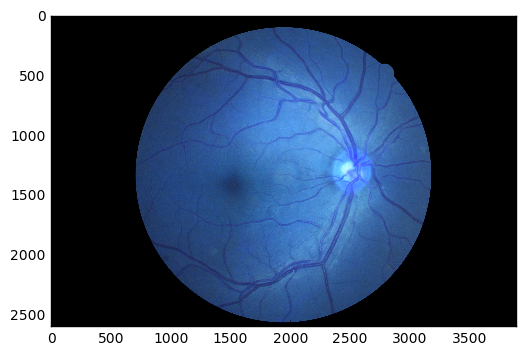

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
#plt.imshow(gray, cmap='gray')

In [10]:
#_,thresh = cv2.threshold(gray,1,255, 0)

In [11]:
#contours = cv2.findContours(thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)

In [12]:
#contour = contours[0]
#contour

In [13]:
#x,y,w,h = cv2.boundingRect(contour)

In [14]:
#crop = img[y:y+h,x:x+w]

In [15]:
#plt.imshow(crop)

In [16]:
threshold = 15

In [17]:
# Mask of non-black pixels (assuming image has a single channel).
mask = gray > threshold

# Coordinates of non-black pixels.
coords = np.argwhere(mask)

# Bounding box of non-black pixels.
x0, y0 = coords.min(axis=0)
x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top

print x0, y0, x1, y1

# Get the contents of the bounding box.
cropped = img[x0:x1, y0:y1]

101 705 2563 3174


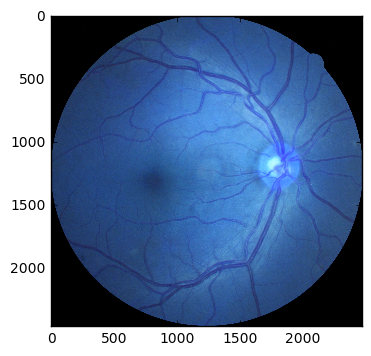

In [18]:
plt.imshow(cropped)

In [24]:
Sample_Metadata_file = open('../data/sample_metadata.txt', 'w')
Sample_Metadata_file.truncate()

In [26]:
for image_name in all_files:
    img = cv2.imread(directory + image_name) #BGR color space
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Mask of non-black pixels (assuming image has a single channel).
    mask = gray > threshold

    # Coordinates of non-black pixels.
    coords = np.argwhere(mask)

    # Bounding box of non-black pixels.
    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top

    Sample_Metadata_file.write("%s,%d,%d,%d,%d\n" %(image_name, x0, y0, x1, y1))

In [27]:
Sample_Metadata_file.close()